In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

In [2]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [3]:
df = pd.read_csv('letter-recognition.data',header=None)

train_df = df[:1600]
test_df = df[16000:16000+400]

X = train_df.ix[:,1:16].to_numpy() 
y = np.array([ord(l)-ord('A') for l in train_df.ix[:,0].to_numpy()])

In [4]:
def get_winner(class1, class2):
    
    numbers = [*range(26)] # number 2 > number 1
    number_of_classification = 2

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])


    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = len(class1_label) + len(class2_label)
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 9)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-letter2")
    [stats, winner] = run(config_path)
    
    return winner

In [5]:
winner_list = []

for class1 in range(0,25):
    for class2 in range(class1+1,26):
        winner = get_winner(class1, class2)
        winner_list.append(winner)

number of class1:64
number of class2:70

 ****** Running generation 0 ****** 

Population's average fitness: 0.51534 stdev: 0.10558
Best fitness: 0.94776 - size: (2, 3) - species 3 - id 121
Average adjusted fitness: 0.442
Mean genetic distance 2.796, standard deviation 0.556
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 0.420 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55370 stdev: 0.12322
Best fitness: 0.97015 - size: (3, 5) - species 7 - id 205
Average adjusted fitness: 0.327
Mean genetic distance 2.887, standard deviation 0.532
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 0.628 sec (0.524 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55880 stdev: 0.14346
Best fitness: 0.97761 - size: (4, 7) - species 6 - id 521
Average adjusted fitness: 0.439
Mean genetic distance 2.988, standard deviation 0.545
Population of 202 members in 24 species
Total extinctions: 0

Total extinctions: 0
Generation time: 0.592 sec (0.648 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.65171 stdev: 0.17877
Best fitness: 0.98529 - size: (4, 8) - species 22 - id 1309
Average adjusted fitness: 0.343
Mean genetic distance 3.126, standard deviation 0.555
Population of 194 members in 28 species
Total extinctions: 0
Generation time: 0.636 sec (0.647 average)
number of class1:64
number of class2:55

 ****** Running generation 0 ****** 

Population's average fitness: 0.50887 stdev: 0.13178
Best fitness: 0.95798 - size: (2, 3) - species 2 - id 89
Average adjusted fitness: 0.462
Mean genetic distance 2.650, standard deviation 0.486
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 0.342 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57093 stdev: 0.14422
Best fitness: 0.96639 - size: (2, 4) - species 2 - id 366
Average adjusted fitness: 0.470
Mean genetic distance 2.679, standard deviation 0

Population of 202 members in 26 species
Total extinctions: 0
Generation time: 0.522 sec (0.606 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60131 stdev: 0.16212
Best fitness: 0.96800 - size: (5, 10) - species 15 - id 886
Average adjusted fitness: 0.486
Mean genetic distance 2.998, standard deviation 0.574
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 0.527 sec (0.593 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61182 stdev: 0.16029
Best fitness: 0.96800 - size: (5, 10) - species 15 - id 886
Average adjusted fitness: 0.320
Mean genetic distance 2.998, standard deviation 0.596
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 0.640 sec (0.600 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61378 stdev: 0.15904
Best fitness: 0.96800 - size: (5, 10) - species 15 - id 886
Average adjusted fitness: 0.206
Mean genetic distance 3.005,

Population's average fitness: 0.52367 stdev: 0.10130
Best fitness: 0.89116 - size: (2, 3) - species 1 - id 442
Average adjusted fitness: 0.428
Mean genetic distance 2.786, standard deviation 0.577
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 0.543 sec (0.493 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55109 stdev: 0.10699
Best fitness: 0.89116 - size: (2, 3) - species 11 - id 442
Average adjusted fitness: 0.291
Mean genetic distance 2.863, standard deviation 0.584
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 0.548 sec (0.507 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56605 stdev: 0.10420
Best fitness: 0.89116 - size: (2, 3) - species 11 - id 442
Average adjusted fitness: 0.273
Mean genetic distance 2.867, standard deviation 0.598
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 0.570 sec (0.520 average)

 ****** Running 


Population's average fitness: 0.50162 stdev: 0.11090
Best fitness: 0.96403 - size: (2, 3) - species 7 - id 65
Average adjusted fitness: 0.436
Mean genetic distance 2.645, standard deviation 0.483
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 0.434 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54265 stdev: 0.13508
Best fitness: 0.96403 - size: (2, 3) - species 1 - id 65
Average adjusted fitness: 0.460
Mean genetic distance 2.693, standard deviation 0.575
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 0.500 sec (0.467 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56033 stdev: 0.14106
Best fitness: 0.96403 - size: (2, 3) - species 6 - id 65
Average adjusted fitness: 0.502
Mean genetic distance 2.786, standard deviation 0.552
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 0.602 sec (0.512 average)

 ****** Running generation 3 ****** 

Mean genetic distance 3.026, standard deviation 0.517
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 0.885 sec (0.489 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57748 stdev: 0.16170
Best fitness: 0.99167 - size: (4, 6) - species 5 - id 998
Average adjusted fitness: 0.558
Mean genetic distance 3.070, standard deviation 0.536
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 0.861 sec (0.536 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60306 stdev: 0.16458
Best fitness: 0.99167 - size: (5, 8) - species 7 - id 1410
Average adjusted fitness: 0.521
Mean genetic distance 3.072, standard deviation 0.514
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 0.769 sec (0.562 average)
number of class1:64
number of class2:70

 ****** Running generation 0 ****** 

Population's average fitness: 0.48869 stdev: 0.11592
Best fitness: 0.88806 - size:

Best fitness: 0.92373 - size: (4, 7) - species 19 - id 706
Average adjusted fitness: 0.345
Mean genetic distance 2.897, standard deviation 0.509
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 0.436 sec (0.405 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55988 stdev: 0.12409
Best fitness: 0.92373 - size: (4, 7) - species 5 - id 706
Average adjusted fitness: 0.319
Mean genetic distance 2.991, standard deviation 0.544
Population of 202 members in 22 species
Total extinctions: 0
Generation time: 0.457 sec (0.415 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56998 stdev: 0.12009
Best fitness: 0.92373 - size: (4, 8) - species 15 - id 983
Average adjusted fitness: 0.248
Mean genetic distance 3.001, standard deviation 0.541
Population of 202 members in 22 species
Total extinctions: 0
Generation time: 0.510 sec (0.431 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0


Population's average fitness: 0.49813 stdev: 0.13943
Best fitness: 0.95000 - size: (2, 3) - species 5 - id 31
Average adjusted fitness: 0.464
Mean genetic distance 2.643, standard deviation 0.473
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 0.303 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55038 stdev: 0.14456
Best fitness: 0.97500 - size: (2, 4) - species 4 - id 280
Average adjusted fitness: 0.468
Mean genetic distance 2.723, standard deviation 0.521
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 0.356 sec (0.329 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58634 stdev: 0.16714
Best fitness: 0.97500 - size: (2, 4) - species 9 - id 280
Average adjusted fitness: 0.474
Mean genetic distance 2.727, standard deviation 0.594
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 0.402 sec (0.353 average)

 ****** Running generation 3 *****

Population of 204 members in 31 species
Total extinctions: 0
Generation time: 0.465 sec (0.409 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.62061 stdev: 0.19080
Best fitness: 0.99057 - size: (4, 7) - species 24 - id 1198
Average adjusted fitness: 0.370
Mean genetic distance 3.061, standard deviation 0.568
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 0.481 sec (0.418 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.64971 stdev: 0.19753
Best fitness: 0.99057 - size: (4, 7) - species 24 - id 1198
Average adjusted fitness: 0.398
Mean genetic distance 3.034, standard deviation 0.564
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 0.514 sec (0.429 average)
number of class1:64
number of class2:65

 ****** Running generation 0 ****** 

Population's average fitness: 0.49651 stdev: 0.08617
Best fitness: 0.89922 - size: (2, 3) - species 2 - id 4
Average adjusted fitness

Average adjusted fitness: 0.380
Mean genetic distance 2.987, standard deviation 0.570
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 0.481 sec (0.447 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60332 stdev: 0.15624
Best fitness: 0.97391 - size: (3, 4) - species 20 - id 683
Average adjusted fitness: 0.365
Mean genetic distance 3.022, standard deviation 0.584
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 0.481 sec (0.453 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61722 stdev: 0.19256
Best fitness: 0.97391 - size: (3, 4) - species 20 - id 683
Average adjusted fitness: 0.541
Mean genetic distance 3.047, standard deviation 0.600
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 0.466 sec (0.455 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.64317 stdev: 0.19635
Best fitness: 0.97391 - size: (3, 4)

Mean genetic distance 2.689, standard deviation 0.531
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 0.378 sec (0.360 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.52880 stdev: 0.10008
Best fitness: 0.88000 - size: (2, 4) - species 9 - id 516
Average adjusted fitness: 0.411
Mean genetic distance 2.688, standard deviation 0.541
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 0.386 sec (0.366 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.53907 stdev: 0.11198
Best fitness: 0.88000 - size: (2, 4) - species 13 - id 516
Average adjusted fitness: 0.250
Mean genetic distance 2.774, standard deviation 0.497
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 0.429 sec (0.379 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.55092 stdev: 0.10955
Best fitness: 0.90400 - size: (5, 9) - species 5 - id 1019
Average ad

Population's average fitness: 0.50643 stdev: 0.05965
Best fitness: 0.77143 - size: (2, 3) - species 2 - id 30
Average adjusted fitness: 0.310
Mean genetic distance 2.782, standard deviation 0.574
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 0.382 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52017 stdev: 0.06665
Best fitness: 0.86429 - size: (2, 4) - species 2 - id 343
Average adjusted fitness: 0.191
Mean genetic distance 2.891, standard deviation 0.581
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 0.429 sec (0.405 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54078 stdev: 0.08702
Best fitness: 0.86429 - size: (2, 4) - species 4 - id 343
Average adjusted fitness: 0.264
Mean genetic distance 2.957, standard deviation 0.570
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 0.473 sec (0.428 average)

 ****** Running generation 3 ******

Mean genetic distance 2.906, standard deviation 0.539
Population of 204 members in 24 species
Total extinctions: 0
Generation time: 0.589 sec (0.524 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61457 stdev: 0.13994
Best fitness: 0.88889 - size: (5, 7) - species 11 - id 956
Average adjusted fitness: 0.312
Mean genetic distance 2.991, standard deviation 0.549
Population of 205 members in 28 species
Total extinctions: 0
Generation time: 0.598 sec (0.533 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62343 stdev: 0.15311
Best fitness: 0.88889 - size: (5, 7) - species 11 - id 956
Average adjusted fitness: 0.435
Mean genetic distance 3.038, standard deviation 0.553
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 0.610 sec (0.542 average)
number of class1:70
number of class2:66

 ****** Running generation 0 ****** 

Population's average fitness: 0.50187 stdev: 0.06808
Best fitness: 0.81618 - size

Population of 201 members in 20 species
Total extinctions: 0
Generation time: 0.526 sec (0.522 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58847 stdev: 0.15496
Best fitness: 0.94483 - size: (2, 4) - species 1 - id 326
Average adjusted fitness: 0.481
Mean genetic distance 2.823, standard deviation 0.534
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 0.565 sec (0.530 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61462 stdev: 0.16079
Best fitness: 0.95172 - size: (5, 8) - species 19 - id 1029
Average adjusted fitness: 0.446
Mean genetic distance 2.871, standard deviation 0.577
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 0.538 sec (0.532 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58628 stdev: 0.15243
Best fitness: 0.95172 - size: (5, 8) - species 19 - id 1029
Average adjusted fitness: 0.494
Mean genetic distance 2.909, s

Generation time: 0.411 sec (0.399 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52965 stdev: 0.08431
Best fitness: 0.87143 - size: (2, 3) - species 8 - id 135
Average adjusted fitness: 0.242
Mean genetic distance 2.887, standard deviation 0.534
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 0.437 sec (0.411 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.54632 stdev: 0.10251
Best fitness: 0.93571 - size: (2, 4) - species 11 - id 685
Average adjusted fitness: 0.272
Mean genetic distance 2.925, standard deviation 0.528
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 0.459 sec (0.423 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55211 stdev: 0.11087
Best fitness: 0.93571 - size: (2, 4) - species 13 - id 685
Average adjusted fitness: 0.338
Mean genetic distance 2.917, standard deviation 0.527
Population of 198 members in 26 species

number of class2:71

 ****** Running generation 0 ****** 

Population's average fitness: 0.49879 stdev: 0.03861
Best fitness: 0.75177 - size: (2, 3) - species 3 - id 8
Average adjusted fitness: 0.137
Mean genetic distance 2.691, standard deviation 0.506
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 0.392 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51230 stdev: 0.04456
Best fitness: 0.75177 - size: (2, 3) - species 6 - id 8
Average adjusted fitness: 0.137
Mean genetic distance 2.750, standard deviation 0.542
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 0.415 sec (0.403 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.51588 stdev: 0.06252
Best fitness: 0.78014 - size: (3, 7) - species 8 - id 484
Average adjusted fitness: 0.239
Mean genetic distance 2.835, standard deviation 0.543
Population of 203 members in 18 species
Total extinctions: 0
Generation time: 0.449 

Mean genetic distance 2.871, standard deviation 0.535
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 0.531 sec (0.452 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58406 stdev: 0.15525
Best fitness: 0.95238 - size: (4, 7) - species 11 - id 462
Average adjusted fitness: 0.453
Mean genetic distance 2.932, standard deviation 0.538
Population of 204 members in 25 species
Total extinctions: 0
Generation time: 0.529 sec (0.461 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59823 stdev: 0.15234
Best fitness: 0.96032 - size: (5, 9) - species 5 - id 1503
Average adjusted fitness: 0.332
Mean genetic distance 3.062, standard deviation 0.532
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 0.564 sec (0.473 average)
number of class1:70
number of class2:57

 ****** Running generation 0 ****** 

Population's average fitness: 0.49331 stdev: 0.10416
Best fitness: 0.95276 - size

Mean genetic distance 2.980, standard deviation 0.539
Population of 195 members in 27 species
Total extinctions: 0
Generation time: 0.581 sec (0.478 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.56748 stdev: 0.11577
Best fitness: 0.88889 - size: (4, 8) - species 15 - id 1171
Average adjusted fitness: 0.275
Mean genetic distance 3.018, standard deviation 0.533
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 0.577 sec (0.489 average)
number of class1:70
number of class2:63

 ****** Running generation 0 ****** 

Population's average fitness: 0.50015 stdev: 0.10543
Best fitness: 1.00000 - size: (2, 3) - species 5 - id 116

Best individual in generation 0 meets fitness threshold - complexity: (2, 3)
number of class1:70
number of class2:51

 ****** Running generation 0 ****** 

Population's average fitness: 0.48190 stdev: 0.09824
Best fitness: 0.82645 - size: (2, 3) - species 1 - id 162
Average adjusted fitness: 0.309
Mean genet

Population of 200 members in 29 species
Total extinctions: 0
Generation time: 0.507 sec (0.404 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.52369 stdev: 0.06051
Best fitness: 0.81081 - size: (4, 7) - species 5 - id 788
Average adjusted fitness: 0.170
Mean genetic distance 3.155, standard deviation 0.546
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 0.470 sec (0.415 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.52842 stdev: 0.05987
Best fitness: 0.87387 - size: (4, 7) - species 7 - id 1171
Average adjusted fitness: 0.137
Mean genetic distance 3.091, standard deviation 0.554
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 0.479 sec (0.424 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.53274 stdev: 0.07033
Best fitness: 0.87387 - size: (4, 7) - species 7 - id 1171
Average adjusted fitness: 0.232
Mean genetic distance 3.087, sta

Average adjusted fitness: 0.210
Mean genetic distance 2.804, standard deviation 0.541
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 0.399 sec (0.362 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55895 stdev: 0.10880
Best fitness: 0.92063 - size: (3, 4) - species 3 - id 371
Average adjusted fitness: 0.270
Mean genetic distance 2.857, standard deviation 0.562
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 0.462 sec (0.382 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56700 stdev: 0.12288
Best fitness: 0.92063 - size: (4, 6) - species 8 - id 949
Average adjusted fitness: 0.334
Mean genetic distance 2.866, standard deviation 0.546
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 0.458 sec (0.395 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57897 stdev: 0.12343
Best fitness: 0.92063 - size: (4, 6) -

Population's average fitness: 0.52973 stdev: 0.08021
Best fitness: 0.82787 - size: (2, 3) - species 7 - id 315
Average adjusted fitness: 0.264
Mean genetic distance 2.850, standard deviation 0.523
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 0.411 sec (0.380 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54910 stdev: 0.09866
Best fitness: 0.90164 - size: (3, 5) - species 1 - id 553
Average adjusted fitness: 0.358
Mean genetic distance 2.876, standard deviation 0.533
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 0.476 sec (0.412 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55746 stdev: 0.11809
Best fitness: 0.90984 - size: (4, 6) - species 15 - id 679
Average adjusted fitness: 0.315
Mean genetic distance 2.865, standard deviation 0.535
Population of 197 members in 23 species
Total extinctions: 0
Generation time: 0.438 sec (0.419 average)

 ****** Running g

Population of 200 members in 29 species
Total extinctions: 0
Generation time: 0.581 sec (0.484 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63836 stdev: 0.17665
Best fitness: 0.96947 - size: (6, 10) - species 21 - id 1159
Average adjusted fitness: 0.442
Mean genetic distance 3.110, standard deviation 0.533
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 0.579 sec (0.494 average)
number of class1:56
number of class2:64

 ****** Running generation 0 ****** 

Population's average fitness: 0.50479 stdev: 0.09446
Best fitness: 0.91667 - size: (2, 3) - species 4 - id 118
Average adjusted fitness: 0.378
Mean genetic distance 2.625, standard deviation 0.496
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 0.351 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53408 stdev: 0.10664
Best fitness: 0.91667 - size: (2, 3) - species 4 - id 118
Average adjusted fitness: 0.458
Mean ge

Average adjusted fitness: 0.375
Mean genetic distance 3.049, standard deviation 0.508
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 0.539 sec (0.447 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57123 stdev: 0.12040
Best fitness: 0.94444 - size: (4, 6) - species 5 - id 1195
Average adjusted fitness: 0.330
Mean genetic distance 3.047, standard deviation 0.506
Population of 194 members in 29 species
Total extinctions: 0
Generation time: 0.533 sec (0.459 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58247 stdev: 0.11955
Best fitness: 0.94444 - size: (4, 6) - species 5 - id 1195
Average adjusted fitness: 0.129
Mean genetic distance 3.054, standard deviation 0.505
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 1.026 sec (0.530 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.57272 stdev: 0.13206
Best fitness: 0.94444 - size: (4, 6)

Mean genetic distance 2.945, standard deviation 0.586
Population of 203 members in 25 species
Total extinctions: 0
Generation time: 0.632 sec (0.581 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55696 stdev: 0.09178
Best fitness: 0.90551 - size: (4, 7) - species 16 - id 625
Average adjusted fitness: 0.234
Mean genetic distance 2.911, standard deviation 0.589
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 0.614 sec (0.589 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56403 stdev: 0.09520
Best fitness: 0.90551 - size: (4, 7) - species 5 - id 625
Average adjusted fitness: 0.210
Mean genetic distance 2.928, standard deviation 0.630
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 0.463 sec (0.564 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56771 stdev: 0.10531
Best fitness: 0.91339 - size: (3, 8) - species 25 - id 981
Average ad

Population's average fitness: 0.49730 stdev: 0.07588
Best fitness: 0.80531 - size: (2, 3) - species 1 - id 177
Average adjusted fitness: 0.347
Mean genetic distance 2.747, standard deviation 0.505
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 0.337 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52138 stdev: 0.09146
Best fitness: 0.90265 - size: (2, 3) - species 10 - id 322
Average adjusted fitness: 0.378
Mean genetic distance 2.837, standard deviation 0.526
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 0.679 sec (0.508 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53778 stdev: 0.11325
Best fitness: 0.90265 - size: (2, 3) - species 13 - id 322
Average adjusted fitness: 0.403
Mean genetic distance 2.844, standard deviation 0.577
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 0.437 sec (0.484 average)

 ****** Running generation 3 ***

Average adjusted fitness: 0.216
Mean genetic distance 3.070, standard deviation 0.603
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 0.511 sec (0.414 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59896 stdev: 0.12169
Best fitness: 0.94215 - size: (2, 6) - species 9 - id 1385
Average adjusted fitness: 0.172
Mean genetic distance 3.167, standard deviation 0.589
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 0.601 sec (0.437 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60862 stdev: 0.13567
Best fitness: 0.94215 - size: (2, 6) - species 28 - id 1385
Average adjusted fitness: 0.193
Mean genetic distance 3.174, standard deviation 0.576
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 0.557 sec (0.451 average)
number of class1:56
number of class2:63

 ****** Running generation 0 ****** 

Population's average fitness: 0.50084 stdev: 0.0

Population's average fitness: 0.55237 stdev: 0.11960
Best fitness: 0.96063 - size: (3, 4) - species 16 - id 627
Average adjusted fitness: 0.344
Mean genetic distance 2.846, standard deviation 0.593
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 0.475 sec (0.429 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56291 stdev: 0.12765
Best fitness: 0.96063 - size: (3, 4) - species 1 - id 627
Average adjusted fitness: 0.362
Mean genetic distance 2.821, standard deviation 0.574
Population of 204 members in 17 species
Total extinctions: 0
Generation time: 0.522 sec (0.445 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57473 stdev: 0.13496
Best fitness: 0.96063 - size: (3, 4) - species 1 - id 627
Average adjusted fitness: 0.387
Mean genetic distance 2.899, standard deviation 0.556
Population of 202 members in 20 species
Total extinctions: 0
Generation time: 0.484 sec (0.450 average)

 ****** Running g

Population's average fitness: 0.52445 stdev: 0.06235
Best fitness: 0.80986 - size: (4, 7) - species 3 - id 507
Average adjusted fitness: 0.170
Mean genetic distance 2.850, standard deviation 0.508
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 0.466 sec (0.414 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.53784 stdev: 0.06983
Best fitness: 0.80986 - size: (4, 7) - species 3 - id 507
Average adjusted fitness: 0.155
Mean genetic distance 2.883, standard deviation 0.531
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 0.563 sec (0.451 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.53982 stdev: 0.07853
Best fitness: 0.83803 - size: (3, 5) - species 22 - id 855
Average adjusted fitness: 0.229
Mean genetic distance 2.977, standard deviation 0.535
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 0.525 sec (0.466 average)

 ****** Running g


Population's average fitness: 0.49710 stdev: 0.05448
Best fitness: 0.74638 - size: (2, 3) - species 2 - id 185
Average adjusted fitness: 0.243
Mean genetic distance 2.836, standard deviation 0.496
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 0.369 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51812 stdev: 0.05711
Best fitness: 0.88406 - size: (3, 5) - species 7 - id 352
Average adjusted fitness: 0.215
Mean genetic distance 2.888, standard deviation 0.488
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 0.509 sec (0.439 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52848 stdev: 0.06928
Best fitness: 0.88406 - size: (3, 5) - species 2 - id 352
Average adjusted fitness: 0.198
Mean genetic distance 2.911, standard deviation 0.518
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 0.522 sec (0.467 average)

 ****** Running generation 3 ****

Population of 205 members in 31 species
Total extinctions: 0
Generation time: 0.607 sec (0.540 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.62104 stdev: 0.16302
Best fitness: 0.99320 - size: (7, 11) - species 29 - id 1344
Average adjusted fitness: 0.205
Mean genetic distance 3.106, standard deviation 0.519
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 0.684 sec (0.558 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61573 stdev: 0.16223
Best fitness: 0.99320 - size: (2, 4) - species 7 - id 451
Average adjusted fitness: 0.244
Mean genetic distance 3.116, standard deviation 0.518
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 0.654 sec (0.568 average)
number of class1:72
number of class2:64

 ****** Running generation 0 ****** 

Population's average fitness: 0.48993 stdev: 0.07002
Best fitness: 0.72059 - size: (2, 3) - species 1 - id 9
Average adjusted fitness:

Average adjusted fitness: 0.323
Mean genetic distance 2.972, standard deviation 0.509
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 0.544 sec (0.493 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56158 stdev: 0.10600
Best fitness: 0.92958 - size: (4, 7) - species 4 - id 777
Average adjusted fitness: 0.239
Mean genetic distance 2.994, standard deviation 0.480
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 0.578 sec (0.507 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57046 stdev: 0.11101
Best fitness: 0.92958 - size: (4, 7) - species 19 - id 777
Average adjusted fitness: 0.254
Mean genetic distance 3.020, standard deviation 0.479
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 0.585 sec (0.518 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57228 stdev: 0.11175
Best fitness: 0.92958 - size: (4, 7) 

Total extinctions: 0
Generation time: 0.407 sec (0.379 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52815 stdev: 0.08046
Best fitness: 0.95105 - size: (2, 5) - species 5 - id 530
Average adjusted fitness: 0.334
Mean genetic distance 2.718, standard deviation 0.501
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 0.423 sec (0.394 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.53797 stdev: 0.08930
Best fitness: 0.95105 - size: (2, 5) - species 1 - id 530
Average adjusted fitness: 0.204
Mean genetic distance 2.831, standard deviation 0.514
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 0.526 sec (0.427 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.54695 stdev: 0.09774
Best fitness: 0.95105 - size: (2, 5) - species 18 - id 530
Average adjusted fitness: 0.150
Mean genetic distance 2.816, standard deviation 0.533
Population of 198 m


Population's average fitness: 0.49787 stdev: 0.11514
Best fitness: 0.98450 - size: (2, 3) - species 6 - id 33
Average adjusted fitness: 0.389
Mean genetic distance 2.685, standard deviation 0.502
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 0.331 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54182 stdev: 0.13373
Best fitness: 0.98450 - size: (2, 3) - species 6 - id 33
Average adjusted fitness: 0.468
Mean genetic distance 2.806, standard deviation 0.550
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 0.371 sec (0.351 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55514 stdev: 0.15169
Best fitness: 0.98450 - size: (3, 4) - species 6 - id 351
Average adjusted fitness: 0.498
Mean genetic distance 2.764, standard deviation 0.556
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 0.405 sec (0.369 average)

 ****** Running generation 3 ******

Population of 208 members in 33 species
Total extinctions: 0
Generation time: 0.760 sec (0.660 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.56896 stdev: 0.11904
Best fitness: 0.92701 - size: (5, 7) - species 17 - id 843
Average adjusted fitness: 0.183
Mean genetic distance 3.049, standard deviation 0.530
Population of 206 members in 33 species
Total extinctions: 0
Generation time: 0.946 sec (0.696 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.57615 stdev: 0.12054
Best fitness: 0.92701 - size: (5, 7) - species 17 - id 843
Average adjusted fitness: 0.230
Mean genetic distance 3.076, standard deviation 0.526
Population of 207 members in 33 species
Total extinctions: 0
Generation time: 0.790 sec (0.706 average)
number of class1:72
number of class2:63

 ****** Running generation 0 ****** 

Population's average fitness: 0.49811 stdev: 0.10259
Best fitness: 0.95556 - size: (2, 3) - species 2 - id 118
Average adjusted fitness

Mean genetic distance 2.924, standard deviation 0.536
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 0.479 sec (0.387 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.55802 stdev: 0.11991
Best fitness: 0.91429 - size: (3, 6) - species 16 - id 679
Average adjusted fitness: 0.243
Mean genetic distance 2.954, standard deviation 0.527
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 0.434 sec (0.395 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.55838 stdev: 0.12527
Best fitness: 0.91429 - size: (3, 6) - species 16 - id 679
Average adjusted fitness: 0.339
Mean genetic distance 2.930, standard deviation 0.538
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 0.463 sec (0.404 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.56012 stdev: 0.12265
Best fitness: 0.91429 - size: (3, 6) - species 16 - id 679
Average a

Population's average fitness: 0.55396 stdev: 0.10367
Best fitness: 0.84348 - size: (4, 6) - species 14 - id 658
Average adjusted fitness: 0.241
Mean genetic distance 2.912, standard deviation 0.578
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 0.453 sec (0.373 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56478 stdev: 0.12358
Best fitness: 0.86957 - size: (3, 5) - species 14 - id 874
Average adjusted fitness: 0.314
Mean genetic distance 3.048, standard deviation 0.544
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 0.491 sec (0.397 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59088 stdev: 0.13577
Best fitness: 0.90435 - size: (4, 7) - species 19 - id 1029
Average adjusted fitness: 0.474
Mean genetic distance 3.072, standard deviation 0.514
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 0.536 sec (0.420 average)

 ****** Runnin

Population's average fitness: 0.50153 stdev: 0.09184
Best fitness: 0.82407 - size: (2, 3) - species 1 - id 183
Average adjusted fitness: 0.356
Mean genetic distance 2.675, standard deviation 0.480
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 0.318 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53412 stdev: 0.10677
Best fitness: 0.82407 - size: (2, 3) - species 1 - id 183
Average adjusted fitness: 0.328
Mean genetic distance 2.794, standard deviation 0.506
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 0.391 sec (0.354 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54318 stdev: 0.11963
Best fitness: 0.82407 - size: (2, 3) - species 16 - id 183
Average adjusted fitness: 0.384
Mean genetic distance 2.852, standard deviation 0.525
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 0.397 sec (0.369 average)

 ****** Running generation 3 ****

Population's average fitness: 0.64782 stdev: 0.17958
Best fitness: 0.97479 - size: (2, 3) - species 16 - id 190
Average adjusted fitness: 0.418
Mean genetic distance 2.881, standard deviation 0.533
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 0.521 sec (0.453 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63866 stdev: 0.18160
Best fitness: 0.97479 - size: (2, 3) - species 16 - id 190
Average adjusted fitness: 0.430
Mean genetic distance 2.885, standard deviation 0.538
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 0.513 sec (0.460 average)
number of class1:55
number of class2:56

 ****** Running generation 0 ****** 

Population's average fitness: 0.50640 stdev: 0.07406
Best fitness: 0.75676 - size: (2, 3) - species 1 - id 2
Average adjusted fitness: 0.338
Mean genetic distance 2.634, standard deviation 0.529
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 0.330

Best fitness: 0.85455 - size: (4, 8) - species 15 - id 856
Average adjusted fitness: 0.330
Mean genetic distance 2.815, standard deviation 0.551
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 0.433 sec (0.378 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.55877 stdev: 0.11432
Best fitness: 0.85455 - size: (2, 3) - species 8 - id 999
Average adjusted fitness: 0.315
Mean genetic distance 2.855, standard deviation 0.542
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 0.428 sec (0.386 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.55970 stdev: 0.11844
Best fitness: 0.85455 - size: (2, 3) - species 8 - id 999
Average adjusted fitness: 0.333
Mean genetic distance 2.947, standard deviation 0.544
Population of 204 members in 22 species
Total extinctions: 0
Generation time: 0.520 sec (0.405 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.

Population's average fitness: 0.54912 stdev: 0.10635
Best fitness: 0.90517 - size: (3, 4) - species 1 - id 491
Average adjusted fitness: 0.373
Mean genetic distance 2.672, standard deviation 0.528
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 0.432 sec (0.382 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55684 stdev: 0.12330
Best fitness: 0.90517 - size: (3, 4) - species 1 - id 491
Average adjusted fitness: 0.384
Mean genetic distance 2.730, standard deviation 0.538
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 0.409 sec (0.389 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58033 stdev: 0.14185
Best fitness: 0.93103 - size: (3, 7) - species 5 - id 836
Average adjusted fitness: 0.484
Mean genetic distance 2.808, standard deviation 0.532
Population of 202 members in 19 species
Total extinctions: 0
Generation time: 0.472 sec (0.405 average)

 ****** Running ge

Total extinctions: 0
Generation time: 0.471 sec (0.439 average)
number of class1:55
number of class2:42

 ****** Running generation 0 ****** 

Population's average fitness: 0.48923 stdev: 0.13653
Best fitness: 0.96907 - size: (2, 3) - species 5 - id 159
Average adjusted fitness: 0.440
Mean genetic distance 2.717, standard deviation 0.562
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 0.287 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53680 stdev: 0.14329
Best fitness: 0.96907 - size: (2, 3) - species 5 - id 159
Average adjusted fitness: 0.519
Mean genetic distance 2.972, standard deviation 0.606
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 0.364 sec (0.326 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57119 stdev: 0.16367
Best fitness: 0.98969 - size: (2, 3) - species 7 - id 524
Average adjusted fitness: 0.461
Mean genetic distance 3.077, standard deviation 0.

Generation time: 0.422 sec (0.368 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.52052 stdev: 0.05729
Best fitness: 0.72642 - size: (2, 3) - species 9 - id 177
Average adjusted fitness: 0.268
Mean genetic distance 3.004, standard deviation 0.538
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 0.410 sec (0.376 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.52498 stdev: 0.05288
Best fitness: 0.72642 - size: (2, 3) - species 9 - id 177
Average adjusted fitness: 0.126
Mean genetic distance 3.008, standard deviation 0.529
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 0.470 sec (0.392 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.53059 stdev: 0.05728
Best fitness: 0.72642 - size: (2, 3) - species 9 - id 177
Average adjusted fitness: 0.179
Mean genetic distance 2.980, standard deviation 0.531
Population of 200 members in 29 species
T


Population's average fitness: 0.56441 stdev: 0.13073
Best fitness: 0.92727 - size: (2, 3) - species 3 - id 132
Average adjusted fitness: 0.415
Mean genetic distance 2.845, standard deviation 0.536
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 0.396 sec (0.353 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57825 stdev: 0.15049
Best fitness: 0.92727 - size: (2, 3) - species 3 - id 132
Average adjusted fitness: 0.435
Mean genetic distance 2.820, standard deviation 0.536
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 0.420 sec (0.370 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58696 stdev: 0.13848
Best fitness: 0.92727 - size: (2, 3) - species 3 - id 132
Average adjusted fitness: 0.307
Mean genetic distance 2.884, standard deviation 0.551
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 0.451 sec (0.386 average)

 ****** Running g


Population's average fitness: 0.50723 stdev: 0.12626
Best fitness: 0.96117 - size: (2, 3) - species 5 - id 190
Average adjusted fitness: 0.455
Mean genetic distance 2.712, standard deviation 0.497
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 0.294 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55465 stdev: 0.11953
Best fitness: 0.96117 - size: (2, 3) - species 7 - id 190
Average adjusted fitness: 0.409
Mean genetic distance 2.715, standard deviation 0.528
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 0.337 sec (0.316 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57165 stdev: 0.12668
Best fitness: 0.96117 - size: (2, 3) - species 7 - id 190
Average adjusted fitness: 0.308
Mean genetic distance 2.697, standard deviation 0.535
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 0.365 sec (0.332 average)

 ****** Running generation 3 ****

Mean genetic distance 3.098, standard deviation 0.511
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 0.659 sec (0.472 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.64777 stdev: 0.16943
Best fitness: 0.95614 - size: (2, 4) - species 8 - id 1178
Average adjusted fitness: 0.572
Mean genetic distance 3.088, standard deviation 0.547
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 0.570 sec (0.484 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63840 stdev: 0.16374
Best fitness: 0.95614 - size: (2, 4) - species 8 - id 1178
Average adjusted fitness: 0.516
Mean genetic distance 3.104, standard deviation 0.530
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 0.595 sec (0.497 average)
number of class1:50
number of class2:56

 ****** Running generation 0 ****** 

Population's average fitness: 0.50811 stdev: 0.09675
Best fitness: 0.88679 - size

Average adjusted fitness: 0.355
Mean genetic distance 3.020, standard deviation 0.536
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 0.426 sec (0.387 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57574 stdev: 0.12828
Best fitness: 0.94286 - size: (3, 5) - species 19 - id 1011
Average adjusted fitness: 0.220
Mean genetic distance 3.063, standard deviation 0.561
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 0.445 sec (0.396 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58490 stdev: 0.13796
Best fitness: 0.94286 - size: (3, 5) - species 19 - id 1011
Average adjusted fitness: 0.265
Mean genetic distance 3.072, standard deviation 0.580
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 0.459 sec (0.405 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59867 stdev: 0.13947
Best fitness: 0.94286 - size: (3, 

Population's average fitness: 0.54511 stdev: 0.08546
Best fitness: 0.77477 - size: (2, 3) - species 9 - id 152
Average adjusted fitness: 0.251
Mean genetic distance 2.772, standard deviation 0.566
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 0.388 sec (0.363 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55829 stdev: 0.09616
Best fitness: 0.77477 - size: (2, 4) - species 7 - id 542
Average adjusted fitness: 0.291
Mean genetic distance 2.847, standard deviation 0.612
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 0.432 sec (0.380 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56051 stdev: 0.09032
Best fitness: 0.77477 - size: (2, 4) - species 7 - id 542
Average adjusted fitness: 0.260
Mean genetic distance 2.873, standard deviation 0.615
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 0.439 sec (0.392 average)

 ****** Running ge


Population's average fitness: 0.49815 stdev: 0.10033
Best fitness: 0.89130 - size: (2, 3) - species 1 - id 21
Average adjusted fitness: 0.438
Mean genetic distance 2.505, standard deviation 0.434
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 0.310 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53826 stdev: 0.11950
Best fitness: 0.95652 - size: (3, 4) - species 5 - id 330
Average adjusted fitness: 0.444
Mean genetic distance 2.573, standard deviation 0.513
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 0.314 sec (0.312 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57126 stdev: 0.15233
Best fitness: 0.96739 - size: (3, 4) - species 6 - id 504
Average adjusted fitness: 0.433
Mean genetic distance 2.610, standard deviation 0.572
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 0.344 sec (0.323 average)

 ****** Running generation 3 ******

Mean genetic distance 3.068, standard deviation 0.548
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 0.576 sec (0.423 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.56920 stdev: 0.10362
Best fitness: 0.86726 - size: (3, 6) - species 23 - id 1337
Average adjusted fitness: 0.267
Mean genetic distance 3.095, standard deviation 0.565
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 0.599 sec (0.445 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58157 stdev: 0.10231
Best fitness: 0.86726 - size: (3, 6) - species 23 - id 1337
Average adjusted fitness: 0.278
Mean genetic distance 3.099, standard deviation 0.552
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 0.549 sec (0.457 average)
number of class1:50
number of class2:51

 ****** Running generation 0 ****** 

Population's average fitness: 0.50495 stdev: 0.10635
Best fitness: 0.93069 - si

Best fitness: 0.92562 - size: (4, 5) - species 8 - id 471
Average adjusted fitness: 0.461
Mean genetic distance 2.964, standard deviation 0.542
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 0.476 sec (0.418 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56061 stdev: 0.14585
Best fitness: 0.92562 - size: (4, 5) - species 21 - id 471
Average adjusted fitness: 0.477
Mean genetic distance 2.993, standard deviation 0.533
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 0.542 sec (0.443 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58293 stdev: 0.14605
Best fitness: 0.92562 - size: (3, 5) - species 19 - id 1007
Average adjusted fitness: 0.372
Mean genetic distance 3.011, standard deviation 0.516
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 0.544 sec (0.460 average)

 ****** Running generation 6 ****** 

Population's average fitness: 


Population's average fitness: 0.48465 stdev: 0.09650
Best fitness: 0.82456 - size: (2, 3) - species 8 - id 162
Average adjusted fitness: 0.348
Mean genetic distance 2.785, standard deviation 0.555
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 0.307 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52993 stdev: 0.09837
Best fitness: 0.82456 - size: (2, 4) - species 7 - id 329
Average adjusted fitness: 0.410
Mean genetic distance 2.886, standard deviation 0.609
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 0.377 sec (0.342 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54705 stdev: 0.11359
Best fitness: 0.86842 - size: (3, 6) - species 6 - id 486
Average adjusted fitness: 0.407
Mean genetic distance 2.865, standard deviation 0.588
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 0.428 sec (0.371 average)

 ****** Running generation 3 ****

Population of 202 members in 28 species
Total extinctions: 0
Generation time: 0.523 sec (0.454 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58990 stdev: 0.16086
Best fitness: 0.96800 - size: (5, 9) - species 21 - id 1154
Average adjusted fitness: 0.513
Mean genetic distance 3.027, standard deviation 0.554
Population of 205 members in 28 species
Total extinctions: 0
Generation time: 0.552 sec (0.466 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60023 stdev: 0.14885
Best fitness: 0.96800 - size: (5, 9) - species 21 - id 1154
Average adjusted fitness: 0.142
Mean genetic distance 3.008, standard deviation 0.544
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 0.583 sec (0.479 average)
number of class1:61
number of class2:56

 ****** Running generation 0 ****** 

Population's average fitness: 0.49957 stdev: 0.04603
Best fitness: 0.73504 - size: (2, 3) - species 4 - id 70
Average adjusted fitnes

Average adjusted fitness: 0.202
Mean genetic distance 2.959, standard deviation 0.583
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 0.521 sec (0.418 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.53079 stdev: 0.06080
Best fitness: 0.78448 - size: (3, 5) - species 15 - id 547
Average adjusted fitness: 0.256
Mean genetic distance 3.056, standard deviation 0.591
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 0.464 sec (0.427 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.53165 stdev: 0.06229
Best fitness: 0.78448 - size: (3, 5) - species 15 - id 547
Average adjusted fitness: 0.139
Mean genetic distance 3.049, standard deviation 0.596
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 0.450 sec (0.431 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.53841 stdev: 0.06272
Best fitness: 0.78448 - size: (3, 5)

Population of 200 members in 18 species
Total extinctions: 0
Generation time: 0.423 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53635 stdev: 0.11813
Best fitness: 0.94262 - size: (3, 4) - species 7 - id 325
Average adjusted fitness: 0.447
Mean genetic distance 2.871, standard deviation 0.527
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 0.480 sec (0.452 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55901 stdev: 0.12583
Best fitness: 0.94262 - size: (3, 4) - species 2 - id 325
Average adjusted fitness: 0.224
Mean genetic distance 2.974, standard deviation 0.540
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 1.311 sec (0.738 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55051 stdev: 0.12478
Best fitness: 0.94262 - size: (2, 4) - species 5 - id 653
Average adjusted fitness: 0.360
Mean genetic distance 3.027, standard deviation 0.

Population of 204 members in 27 species
Total extinctions: 0
Generation time: 0.553 sec (0.557 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60680 stdev: 0.16531
Best fitness: 0.96610 - size: (3, 5) - species 7 - id 769
Average adjusted fitness: 0.518
Mean genetic distance 3.054, standard deviation 0.619
Population of 205 members in 27 species
Total extinctions: 0
Generation time: 0.497 sec (0.550 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60360 stdev: 0.17109
Best fitness: 0.96610 - size: (3, 5) - species 7 - id 769
Average adjusted fitness: 0.538
Mean genetic distance 3.036, standard deviation 0.613
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 0.540 sec (0.549 average)
number of class1:61
number of class2:42

 ****** Running generation 0 ****** 

Population's average fitness: 0.48845 stdev: 0.13412
Best fitness: 0.90291 - size: (2, 3) - species 7 - id 82
Average adjusted fitness: 0

Average adjusted fitness: 0.482
Mean genetic distance 2.995, standard deviation 0.522
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 0.484 sec (0.423 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56742 stdev: 0.13621
Best fitness: 0.93548 - size: (3, 5) - species 2 - id 854
Average adjusted fitness: 0.302
Mean genetic distance 3.014, standard deviation 0.525
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 0.557 sec (0.446 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58879 stdev: 0.14691
Best fitness: 0.93548 - size: (4, 6) - species 22 - id 1112
Average adjusted fitness: 0.432
Mean genetic distance 3.027, standard deviation 0.525
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 0.565 sec (0.463 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59806 stdev: 0.14981
Best fitness: 0.94355 - size: (5, 8)

Generation time: 0.453 sec (0.426 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55248 stdev: 0.11752
Best fitness: 0.87582 - size: (3, 6) - species 5 - id 728
Average adjusted fitness: 0.386
Mean genetic distance 2.811, standard deviation 0.506
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 0.497 sec (0.444 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55195 stdev: 0.13060
Best fitness: 0.90196 - size: (3, 6) - species 2 - id 881
Average adjusted fitness: 0.336
Mean genetic distance 2.896, standard deviation 0.495
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 0.526 sec (0.460 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.55892 stdev: 0.12411
Best fitness: 0.90196 - size: (3, 6) - species 3 - id 881
Average adjusted fitness: 0.262
Mean genetic distance 2.937, standard deviation 0.484
Population of 201 members in 26 species
T


Population's average fitness: 0.50003 stdev: 0.06684
Best fitness: 0.91724 - size: (2, 3) - species 1 - id 82
Average adjusted fitness: 0.218
Mean genetic distance 2.796, standard deviation 0.521
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 0.384 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53405 stdev: 0.08707
Best fitness: 0.91724 - size: (2, 3) - species 3 - id 82
Average adjusted fitness: 0.127
Mean genetic distance 2.893, standard deviation 0.504
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 0.495 sec (0.440 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53678 stdev: 0.09665
Best fitness: 0.91724 - size: (2, 3) - species 4 - id 82
Average adjusted fitness: 0.411
Mean genetic distance 2.849, standard deviation 0.550
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 0.502 sec (0.460 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.54260 stdev: 0.08330
Best fitness: 0.74603 - size: (3, 5) - species 24 - id 503
Average adjusted fitness: 0.242
Mean genetic distance 2.988, standard deviation 0.542
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 0.858 sec (0.526 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.53860 stdev: 0.08826
Best fitness: 0.75397 - size: (2, 3) - species 6 - id 1317
Average adjusted fitness: 0.199
Mean genetic distance 2.983, standard deviation 0.562
Population of 206 members in 27 species
Total extinctions: 0
Generation time: 0.597 sec (0.535 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.55609 stdev: 0.08735
Best fitness: 0.76190 - size: (2, 4) - species 6 - id 1480
Average adjusted fitness: 0.114
Mean genetic distance 2.975, standard deviation 0.562
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 0.578 sec (0.540 average)
number of class1

Population of 202 members in 22 species
Total extinctions: 0
Generation time: 0.516 sec (0.458 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.53721 stdev: 0.09335
Best fitness: 0.79032 - size: (4, 5) - species 14 - id 419
Average adjusted fitness: 0.199
Mean genetic distance 2.979, standard deviation 0.554
Population of 204 members in 26 species
Total extinctions: 0
Generation time: 0.529 sec (0.470 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.55159 stdev: 0.09630
Best fitness: 0.79032 - size: (4, 5) - species 14 - id 419
Average adjusted fitness: 0.302
Mean genetic distance 2.965, standard deviation 0.547
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 0.547 sec (0.481 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.55907 stdev: 0.09236
Best fitness: 0.79032 - size: (4, 5) - species 14 - id 419
Average adjusted fitness: 0.131
Mean genetic distance 2.997, st

Generation time: 0.405 sec (0.376 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.54970 stdev: 0.09241
Best fitness: 0.85714 - size: (4, 6) - species 9 - id 678
Average adjusted fitness: 0.169
Mean genetic distance 2.815, standard deviation 0.520
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 0.414 sec (0.385 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.54654 stdev: 0.09497
Best fitness: 0.85714 - size: (4, 6) - species 9 - id 678
Average adjusted fitness: 0.232
Mean genetic distance 2.924, standard deviation 0.552
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 0.465 sec (0.401 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.55852 stdev: 0.10710
Best fitness: 0.88095 - size: (3, 5) - species 6 - id 963
Average adjusted fitness: 0.206
Mean genetic distance 2.968, standard deviation 0.549
Population of 202 members in 27 species
T

Population's average fitness: 0.50333 stdev: 0.05082
Best fitness: 0.78519 - size: (2, 3) - species 2 - id 91
Average adjusted fitness: 0.215
Mean genetic distance 2.729, standard deviation 0.487
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 0.387 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52301 stdev: 0.07417
Best fitness: 0.78519 - size: (2, 3) - species 6 - id 91
Average adjusted fitness: 0.226
Mean genetic distance 2.809, standard deviation 0.503
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 0.405 sec (0.396 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53307 stdev: 0.07815
Best fitness: 0.78519 - size: (2, 3) - species 2 - id 91
Average adjusted fitness: 0.280
Mean genetic distance 2.802, standard deviation 0.508
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 0.434 sec (0.409 average)

 ****** Running generation 3 ****** 


Population's average fitness: 0.59670 stdev: 0.14584
Best fitness: 0.94215 - size: (4, 8) - species 39 - id 706
Average adjusted fitness: 0.490
Mean genetic distance 2.846, standard deviation 0.514
Population of 198 members in 44 species
Total extinctions: 0
Generation time: 0.976 sec (0.627 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61495 stdev: 0.14183
Best fitness: 0.94215 - size: (4, 8) - species 39 - id 706
Average adjusted fitness: 0.279
Mean genetic distance 2.919, standard deviation 0.517
Population of 203 members in 44 species
Total extinctions: 0
Generation time: 0.732 sec (0.640 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60384 stdev: 0.15112
Best fitness: 0.94215 - size: (4, 8) - species 39 - id 706
Average adjusted fitness: 0.355
Mean genetic distance 2.939, standard deviation 0.516
Population of 198 members in 44 species
Total extinctions: 0
Generation time: 1.535 sec (0.740 average)
number of class1

Population of 202 members in 19 species
Total extinctions: 0
Generation time: 0.432 sec (0.388 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57741 stdev: 0.15029
Best fitness: 0.88496 - size: (4, 7) - species 11 - id 596
Average adjusted fitness: 0.462
Mean genetic distance 2.845, standard deviation 0.495
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 0.439 sec (0.398 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57763 stdev: 0.14450
Best fitness: 0.88496 - size: (4, 7) - species 11 - id 596
Average adjusted fitness: 0.421
Mean genetic distance 2.868, standard deviation 0.470
Population of 204 members in 25 species
Total extinctions: 0
Generation time: 0.475 sec (0.411 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58555 stdev: 0.14045
Best fitness: 0.92035 - size: (4, 7) - species 2 - id 1143
Average adjusted fitness: 0.353
Mean genetic distance 2.912, st

Population of 202 members in 35 species
Total extinctions: 0
Generation time: 0.548 sec (0.513 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.64980 stdev: 0.17561
Best fitness: 0.96552 - size: (4, 7) - species 5 - id 977
Average adjusted fitness: 0.265
Mean genetic distance 3.160, standard deviation 0.506
Population of 206 members in 36 species
Total extinctions: 0
Generation time: 0.569 sec (0.519 average)
number of class1:60
number of class2:70

 ****** Running generation 0 ****** 

Population's average fitness: 0.48977 stdev: 0.11901
Best fitness: 0.90769 - size: (2, 3) - species 9 - id 73
Average adjusted fitness: 0.391
Mean genetic distance 2.691, standard deviation 0.513
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 0.354 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53379 stdev: 0.10651
Best fitness: 0.90769 - size: (2, 3) - species 9 - id 73
Average adjusted fitness: 0.398
Mean genetic

Mean genetic distance 2.932, standard deviation 0.532
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 0.469 sec (0.413 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60750 stdev: 0.17241
Best fitness: 0.93860 - size: (3, 5) - species 10 - id 851
Average adjusted fitness: 0.505
Mean genetic distance 2.959, standard deviation 0.519
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 0.522 sec (0.431 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61662 stdev: 0.17381
Best fitness: 0.94737 - size: (6, 11) - species 4 - id 1120
Average adjusted fitness: 0.440
Mean genetic distance 2.997, standard deviation 0.515
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 0.523 sec (0.444 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.64829 stdev: 0.17954
Best fitness: 0.94737 - size: (6, 11) - species 4 - id 1120
Average

Mean genetic distance 2.944, standard deviation 0.534
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 0.422 sec (0.373 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56238 stdev: 0.13515
Best fitness: 0.94828 - size: (4, 6) - species 4 - id 477
Average adjusted fitness: 0.475
Mean genetic distance 3.000, standard deviation 0.512
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 0.458 sec (0.395 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58375 stdev: 0.14687
Best fitness: 0.94828 - size: (4, 6) - species 4 - id 477
Average adjusted fitness: 0.503
Mean genetic distance 2.970, standard deviation 0.516
Population of 207 members in 25 species
Total extinctions: 0
Generation time: 0.477 sec (0.411 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60899 stdev: 0.15119
Best fitness: 0.95690 - size: (6, 10) - species 4 - id 1026
Average ad

Mean genetic distance 3.063, standard deviation 0.537
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 0.572 sec (0.463 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.64529 stdev: 0.18179
Best fitness: 0.95200 - size: (4, 7) - species 18 - id 1221
Average adjusted fitness: 0.558
Mean genetic distance 3.093, standard deviation 0.520
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 0.564 sec (0.474 average)
number of class1:60
number of class2:63

 ****** Running generation 0 ****** 

Population's average fitness: 0.50280 stdev: 0.09132
Best fitness: 0.94309 - size: (2, 3) - species 7 - id 38
Average adjusted fitness: 0.399
Mean genetic distance 2.691, standard deviation 0.490
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 0.354 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54061 stdev: 0.10160
Best fitness: 0.94309 - size: (2, 3) - specie

Mean genetic distance 3.130, standard deviation 0.521
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 0.591 sec (0.473 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57672 stdev: 0.13379
Best fitness: 0.88591 - size: (5, 9) - species 3 - id 851
Average adjusted fitness: 0.331
Mean genetic distance 3.147, standard deviation 0.518
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 0.612 sec (0.496 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59541 stdev: 0.14025
Best fitness: 0.88591 - size: (5, 9) - species 3 - id 851
Average adjusted fitness: 0.285
Mean genetic distance 3.152, standard deviation 0.535
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 0.582 sec (0.508 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60007 stdev: 0.14035
Best fitness: 0.88591 - size: (5, 9) - species 3 - id 851
Average adju


Population's average fitness: 0.49471 stdev: 0.10952
Best fitness: 0.84173 - size: (2, 3) - species 7 - id 135
Average adjusted fitness: 0.279
Mean genetic distance 2.625, standard deviation 0.492
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 0.335 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53687 stdev: 0.11341
Best fitness: 0.84173 - size: (2, 3) - species 7 - id 135
Average adjusted fitness: 0.498
Mean genetic distance 2.828, standard deviation 0.540
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 0.392 sec (0.363 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53514 stdev: 0.12812
Best fitness: 0.85612 - size: (3, 6) - species 2 - id 478
Average adjusted fitness: 0.413
Mean genetic distance 2.883, standard deviation 0.537
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 0.441 sec (0.389 average)

 ****** Running generation 3 ****

Average adjusted fitness: 0.311
Mean genetic distance 3.057, standard deviation 0.506
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 0.534 sec (0.446 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.62634 stdev: 0.14740
Best fitness: 0.86232 - size: (3, 5) - species 1 - id 698
Average adjusted fitness: 0.380
Mean genetic distance 3.052, standard deviation 0.525
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 0.579 sec (0.463 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62440 stdev: 0.15765
Best fitness: 0.86232 - size: (3, 6) - species 31 - id 1372
Average adjusted fitness: 0.384
Mean genetic distance 3.061, standard deviation 0.501
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 0.733 sec (0.493 average)
number of class1:83
number of class2:54

 ****** Running generation 0 ****** 

Population's average fitness: 0.49412 stdev: 0.12

Mean genetic distance 2.813, standard deviation 0.543
Population of 203 members in 18 species
Total extinctions: 0
Generation time: 0.494 sec (0.451 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58799 stdev: 0.14392
Best fitness: 0.95833 - size: (3, 5) - species 1 - id 293
Average adjusted fitness: 0.344
Mean genetic distance 2.911, standard deviation 0.530
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 0.508 sec (0.461 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59143 stdev: 0.15484
Best fitness: 0.95833 - size: (3, 5) - species 1 - id 293
Average adjusted fitness: 0.254
Mean genetic distance 2.974, standard deviation 0.514
Population of 203 members in 24 species
Total extinctions: 0
Generation time: 0.523 sec (0.470 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60355 stdev: 0.15812
Best fitness: 0.95833 - size: (6, 10) - species 21 - id 1295
Average a

Population's average fitness: 0.53634 stdev: 0.08459
Best fitness: 0.84459 - size: (3, 4) - species 7 - id 292
Average adjusted fitness: 0.242
Mean genetic distance 2.795, standard deviation 0.508
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 0.497 sec (0.517 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54322 stdev: 0.10376
Best fitness: 0.85811 - size: (4, 5) - species 12 - id 395
Average adjusted fitness: 0.289
Mean genetic distance 2.834, standard deviation 0.550
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 0.512 sec (0.515 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.54730 stdev: 0.11229
Best fitness: 0.85811 - size: (3, 6) - species 8 - id 645
Average adjusted fitness: 0.356
Mean genetic distance 2.878, standard deviation 0.559
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 0.511 sec (0.514 average)

 ****** Running g

Population of 203 members in 31 species
Total extinctions: 0
Generation time: 0.585 sec (0.466 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61429 stdev: 0.16246
Best fitness: 0.91045 - size: (4, 7) - species 6 - id 1482
Average adjusted fitness: 0.238
Mean genetic distance 3.034, standard deviation 0.537
Population of 206 members in 36 species
Total extinctions: 0
Generation time: 0.551 sec (0.476 average)
number of class1:66
number of class2:53

 ****** Running generation 0 ****** 

Population's average fitness: 0.49895 stdev: 0.10902
Best fitness: 0.90756 - size: (2, 3) - species 6 - id 87
Average adjusted fitness: 0.406
Mean genetic distance 2.719, standard deviation 0.498
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 0.303 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53501 stdev: 0.13589
Best fitness: 0.90756 - size: (2, 3) - species 6 - id 87
Average adjusted fitness: 0.420
Mean geneti

Mean genetic distance 2.940, standard deviation 0.541
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 0.558 sec (0.448 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57162 stdev: 0.11974
Best fitness: 0.92308 - size: (2, 3) - species 12 - id 189
Average adjusted fitness: 0.308
Mean genetic distance 2.975, standard deviation 0.533
Population of 197 members in 25 species
Total extinctions: 0
Generation time: 0.537 sec (0.460 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.56954 stdev: 0.11918
Best fitness: 0.92308 - size: (2, 3) - species 12 - id 189
Average adjusted fitness: 0.368
Mean genetic distance 3.014, standard deviation 0.509
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 0.525 sec (0.469 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58334 stdev: 0.13022
Best fitness: 0.92308 - size: (2, 3) - species 12 - id 189
Average a

Population's average fitness: 0.53645 stdev: 0.08596
Best fitness: 0.80165 - size: (2, 3) - species 6 - id 886
Average adjusted fitness: 0.202
Mean genetic distance 2.925, standard deviation 0.591
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 0.417 sec (0.413 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.54669 stdev: 0.08745
Best fitness: 0.80165 - size: (2, 3) - species 6 - id 886
Average adjusted fitness: 0.107
Mean genetic distance 2.986, standard deviation 0.587
Population of 202 members in 22 species
Total extinctions: 0
Generation time: 0.456 sec (0.420 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.55380 stdev: 0.09384
Best fitness: 0.80165 - size: (2, 3) - species 6 - id 886
Average adjusted fitness: 0.201
Mean genetic distance 3.038, standard deviation 0.596
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 0.436 sec (0.422 average)

 ****** Running ge

Mean genetic distance 2.901, standard deviation 0.546
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 0.563 sec (0.452 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55326 stdev: 0.11036
Best fitness: 0.89764 - size: (3, 5) - species 12 - id 328
Average adjusted fitness: 0.245
Mean genetic distance 3.007, standard deviation 0.569
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 0.559 sec (0.479 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55831 stdev: 0.11267
Best fitness: 0.89764 - size: (3, 5) - species 20 - id 328
Average adjusted fitness: 0.247
Mean genetic distance 3.055, standard deviation 0.519
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 0.552 sec (0.493 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57005 stdev: 0.11595
Best fitness: 0.90551 - size: (3, 6) - species 19 - id 1031
Average 

Population's average fitness: 0.49931 stdev: 0.13614
Best fitness: 0.92593 - size: (2, 3) - species 2 - id 4
Average adjusted fitness: 0.452
Mean genetic distance 2.635, standard deviation 0.477
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 0.319 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54495 stdev: 0.13003
Best fitness: 0.92593 - size: (2, 3) - species 1 - id 4
Average adjusted fitness: 0.398
Mean genetic distance 2.721, standard deviation 0.496
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 0.338 sec (0.329 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55139 stdev: 0.14652
Best fitness: 0.94444 - size: (3, 5) - species 14 - id 504
Average adjusted fitness: 0.422
Mean genetic distance 2.703, standard deviation 0.509
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 0.345 sec (0.334 average)

 ****** Running generation 3 ****** 


Average adjusted fitness: 0.211
Mean genetic distance 2.935, standard deviation 0.567
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 0.500 sec (0.432 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57695 stdev: 0.13835
Best fitness: 0.91473 - size: (3, 6) - species 16 - id 1348
Average adjusted fitness: 0.358
Mean genetic distance 2.960, standard deviation 0.561
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 0.581 sec (0.451 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58213 stdev: 0.14213
Best fitness: 0.98450 - size: (6, 11) - species 13 - id 1485
Average adjusted fitness: 0.404
Mean genetic distance 3.013, standard deviation 0.539
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 0.597 sec (0.467 average)
number of class1:66
number of class2:51

 ****** Running generation 0 ****** 

Population's average fitness: 0.49714 stdev: 0

Average adjusted fitness: 0.565
Mean genetic distance 2.924, standard deviation 0.573
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 0.442 sec (0.385 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.64223 stdev: 0.18082
Best fitness: 0.97436 - size: (3, 5) - species 7 - id 541
Average adjusted fitness: 0.472
Mean genetic distance 2.912, standard deviation 0.595
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 0.428 sec (0.394 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.65803 stdev: 0.18212
Best fitness: 0.98291 - size: (4, 9) - species 14 - id 993
Average adjusted fitness: 0.607
Mean genetic distance 2.964, standard deviation 0.583
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 0.444 sec (0.402 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.64987 stdev: 0.18207
Best fitness: 0.98291 - size: (4, 9) 

Mean genetic distance 2.674, standard deviation 0.486
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 0.302 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54178 stdev: 0.10247
Best fitness: 0.88889 - size: (2, 4) - species 13 - id 325
Average adjusted fitness: 0.272
Mean genetic distance 2.816, standard deviation 0.559
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 0.351 sec (0.327 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57014 stdev: 0.13195
Best fitness: 0.88889 - size: (4, 6) - species 3 - id 438
Average adjusted fitness: 0.449
Mean genetic distance 2.883, standard deviation 0.566
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 0.371 sec (0.341 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.59037 stdev: 0.12771
Best fitness: 0.88889 - size: (4, 6) - species 2 - id 438
Average adjusted fitness: 0


 ****** Running generation 7 ****** 

Population's average fitness: 0.62206 stdev: 0.15878
Best fitness: 0.88710 - size: (3, 6) - species 27 - id 1248
Average adjusted fitness: 0.470
Mean genetic distance 3.018, standard deviation 0.544
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 0.595 sec (0.508 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62069 stdev: 0.15224
Best fitness: 0.90323 - size: (4, 8) - species 27 - id 1425
Average adjusted fitness: 0.368
Mean genetic distance 3.028, standard deviation 0.527
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 0.583 sec (0.516 average)
number of class1:53
number of class2:61

 ****** Running generation 0 ****** 

Population's average fitness: 0.49943 stdev: 0.10945
Best fitness: 0.91228 - size: (2, 3) - species 4 - id 32
Average adjusted fitness: 0.414
Mean genetic distance 2.653, standard deviation 0.482
Population of 200 members in 12 species
T

Population's average fitness: 0.58776 stdev: 0.15195
Best fitness: 0.96364 - size: (4, 7) - species 2 - id 721
Average adjusted fitness: 0.446
Mean genetic distance 2.966, standard deviation 0.535
Population of 202 members in 20 species
Total extinctions: 0
Generation time: 0.413 sec (0.367 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58996 stdev: 0.16535
Best fitness: 0.96364 - size: (4, 7) - species 2 - id 721
Average adjusted fitness: 0.468
Mean genetic distance 3.005, standard deviation 0.550
Population of 203 members in 22 species
Total extinctions: 0
Generation time: 0.493 sec (0.388 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61823 stdev: 0.17006
Best fitness: 0.98182 - size: (5, 9) - species 2 - id 1248
Average adjusted fitness: 0.505
Mean genetic distance 3.011, standard deviation 0.558
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 0.476 sec (0.400 average)

 ****** Running g

Best fitness: 0.95690 - size: (3, 5) - species 6 - id 548
Average adjusted fitness: 0.476
Mean genetic distance 2.928, standard deviation 0.604
Population of 203 members in 19 species
Total extinctions: 0
Generation time: 0.410 sec (0.365 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.59385 stdev: 0.15230
Best fitness: 0.95690 - size: (3, 5) - species 6 - id 548
Average adjusted fitness: 0.420
Mean genetic distance 2.946, standard deviation 0.612
Population of 203 members in 19 species
Total extinctions: 0
Generation time: 0.432 sec (0.381 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.61572 stdev: 0.16339
Best fitness: 0.95690 - size: (3, 5) - species 6 - id 548
Average adjusted fitness: 0.470
Mean genetic distance 2.994, standard deviation 0.607
Population of 202 members in 20 species
Total extinctions: 0
Generation time: 0.454 sec (0.396 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.6

number of class2:56

 ****** Running generation 0 ****** 

Population's average fitness: 0.48718 stdev: 0.09456
Best fitness: 0.73282 - size: (2, 3) - species 2 - id 116
Average adjusted fitness: 0.364
Mean genetic distance 2.739, standard deviation 0.527
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 0.352 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51863 stdev: 0.09752
Best fitness: 0.88550 - size: (3, 5) - species 9 - id 244
Average adjusted fitness: 0.410
Mean genetic distance 2.805, standard deviation 0.550
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 0.438 sec (0.395 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53229 stdev: 0.10087
Best fitness: 0.89313 - size: (2, 3) - species 6 - id 516
Average adjusted fitness: 0.312
Mean genetic distance 2.858, standard deviation 0.551
Population of 202 members in 22 species
Total extinctions: 0
Generation time: 0.

Mean genetic distance 3.076, standard deviation 0.531
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 0.533 sec (0.598 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58330 stdev: 0.15597
Best fitness: 0.96923 - size: (4, 9) - species 3 - id 950
Average adjusted fitness: 0.472
Mean genetic distance 3.086, standard deviation 0.516
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 0.594 sec (0.598 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60988 stdev: 0.15604
Best fitness: 0.96923 - size: (4, 9) - species 3 - id 950
Average adjusted fitness: 0.531
Mean genetic distance 3.075, standard deviation 0.508
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 0.647 sec (0.603 average)
number of class1:75
number of class2:54

 ****** Running generation 0 ****** 

Population's average fitness: 0.49349 stdev: 0.11239
Best fitness: 0.87597 - size: 

Population of 200 members in 25 species
Total extinctions: 0
Generation time: 0.867 sec (0.826 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57048 stdev: 0.18218
Best fitness: 0.99265 - size: (3, 4) - species 18 - id 670
Average adjusted fitness: 0.543
Mean genetic distance 3.027, standard deviation 0.569
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 0.793 sec (0.819 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58556 stdev: 0.17278
Best fitness: 0.99265 - size: (4, 6) - species 4 - id 672
Average adjusted fitness: 0.535
Mean genetic distance 3.062, standard deviation 0.565
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 1.290 sec (0.898 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60735 stdev: 0.17821
Best fitness: 0.99265 - size: (3, 4) - species 24 - id 670
Average adjusted fitness: 0.589
Mean genetic distance 3.123, sta

Best fitness: 0.88889 - size: (3, 6) - species 7 - id 552
Average adjusted fitness: 0.357
Mean genetic distance 2.733, standard deviation 0.503
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 0.434 sec (0.368 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55812 stdev: 0.14326
Best fitness: 0.88889 - size: (3, 6) - species 7 - id 552
Average adjusted fitness: 0.389
Mean genetic distance 2.902, standard deviation 0.549
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 0.432 sec (0.384 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57882 stdev: 0.13861
Best fitness: 0.88889 - size: (3, 6) - species 17 - id 552
Average adjusted fitness: 0.332
Mean genetic distance 2.971, standard deviation 0.548
Population of 203 members in 21 species
Total extinctions: 0
Generation time: 0.438 sec (0.395 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.


Population's average fitness: 0.50794 stdev: 0.13645
Best fitness: 0.96825 - size: (2, 3) - species 2 - id 161
Average adjusted fitness: 0.436
Mean genetic distance 2.626, standard deviation 0.493
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 0.359 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52762 stdev: 0.15367
Best fitness: 0.97619 - size: (2, 4) - species 1 - id 359
Average adjusted fitness: 0.486
Mean genetic distance 2.792, standard deviation 0.528
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 0.457 sec (0.408 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55804 stdev: 0.16776
Best fitness: 0.98413 - size: (3, 4) - species 4 - id 554
Average adjusted fitness: 0.448
Mean genetic distance 2.841, standard deviation 0.530
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 0.430 sec (0.415 average)

 ****** Running generation 3 ****

Population's average fitness: 0.59467 stdev: 0.15273
Best fitness: 0.96639 - size: (2, 3) - species 14 - id 140
Average adjusted fitness: 0.403
Mean genetic distance 2.910, standard deviation 0.532
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 0.485 sec (0.424 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.61719 stdev: 0.16793
Best fitness: 0.96639 - size: (2, 3) - species 22 - id 140
Average adjusted fitness: 0.484
Mean genetic distance 2.910, standard deviation 0.506
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 0.526 sec (0.444 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60995 stdev: 0.16260
Best fitness: 0.96639 - size: (2, 3) - species 22 - id 140
Average adjusted fitness: 0.539
Mean genetic distance 2.955, standard deviation 0.538
Population of 203 members in 24 species
Total extinctions: 0
Generation time: 0.495 sec (0.453 average)

 ****** Running

Population's average fitness: 0.51056 stdev: 0.09076
Best fitness: 0.88800 - size: (2, 3) - species 1 - id 130
Average adjusted fitness: 0.324
Mean genetic distance 2.728, standard deviation 0.499
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 0.317 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53072 stdev: 0.10747
Best fitness: 0.93600 - size: (3, 4) - species 9 - id 275
Average adjusted fitness: 0.246
Mean genetic distance 2.804, standard deviation 0.509
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 0.385 sec (0.351 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54859 stdev: 0.11955
Best fitness: 0.95200 - size: (2, 4) - species 2 - id 459
Average adjusted fitness: 0.235
Mean genetic distance 2.856, standard deviation 0.539
Population of 204 members in 23 species
Total extinctions: 0
Generation time: 0.427 sec (0.376 average)

 ****** Running generation 3 *****

Total extinctions: 0
Generation time: 0.627 sec (0.485 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.56461 stdev: 0.10714
Best fitness: 0.88430 - size: (4, 8) - species 4 - id 1280
Average adjusted fitness: 0.224
Mean genetic distance 3.004, standard deviation 0.511
Population of 192 members in 35 species
Total extinctions: 0
Generation time: 0.576 sec (0.497 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58054 stdev: 0.11675
Best fitness: 0.90083 - size: (5, 8) - species 19 - id 1397
Average adjusted fitness: 0.148
Mean genetic distance 2.987, standard deviation 0.503
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 0.547 sec (0.502 average)
number of class1:64
number of class2:42

 ****** Running generation 0 ****** 

Population's average fitness: 0.51255 stdev: 0.10665
Best fitness: 0.83019 - size: (2, 3) - species 10 - id 184
Average adjusted fitness: 0.186
Mean genetic distance 2.746, s

Average adjusted fitness: 0.285
Mean genetic distance 2.795, standard deviation 0.535
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 0.578 sec (0.453 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58665 stdev: 0.14090
Best fitness: 0.96063 - size: (4, 7) - species 13 - id 888
Average adjusted fitness: 0.438
Mean genetic distance 2.870, standard deviation 0.543
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 0.500 sec (0.461 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58693 stdev: 0.14068
Best fitness: 0.96063 - size: (4, 7) - species 18 - id 888
Average adjusted fitness: 0.397
Mean genetic distance 2.916, standard deviation 0.543
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 0.501 sec (0.466 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59082 stdev: 0.13913
Best fitness: 0.96063 - size: (4, 7)

Population of 203 members in 36 species
Total extinctions: 0
Generation time: 0.547 sec (0.412 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.54560 stdev: 0.08122
Best fitness: 0.80180 - size: (4, 7) - species 20 - id 726
Average adjusted fitness: 0.170
Mean genetic distance 3.092, standard deviation 0.540
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 0.525 sec (0.428 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.55220 stdev: 0.08950
Best fitness: 0.81982 - size: (4, 7) - species 27 - id 1258
Average adjusted fitness: 0.160
Mean genetic distance 3.100, standard deviation 0.538
Population of 206 members in 38 species
Total extinctions: 0
Generation time: 0.516 sec (0.439 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.54863 stdev: 0.08629
Best fitness: 0.81982 - size: (4, 7) - species 27 - id 1258
Average adjusted fitness: 0.163
Mean genetic distance 3.081, 


Population's average fitness: 0.55699 stdev: 0.13547
Best fitness: 0.94017 - size: (5, 8) - species 6 - id 836
Average adjusted fitness: 0.369
Mean genetic distance 2.926, standard deviation 0.558
Population of 202 members in 22 species
Total extinctions: 0
Generation time: 0.464 sec (0.390 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58086 stdev: 0.14522
Best fitness: 0.95726 - size: (4, 7) - species 6 - id 1008
Average adjusted fitness: 0.457
Mean genetic distance 2.962, standard deviation 0.555
Population of 203 members in 22 species
Total extinctions: 0
Generation time: 0.480 sec (0.405 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.56305 stdev: 0.13309
Best fitness: 0.95726 - size: (5, 9) - species 9 - id 1020
Average adjusted fitness: 0.393
Mean genetic distance 2.974, standard deviation 0.545
Population of 203 members in 23 species
Total extinctions: 0
Generation time: 0.543 sec (0.425 average)

 ****** Running

Best fitness: 0.94898 - size: (2, 3) - species 7 - id 222
Average adjusted fitness: 0.368
Mean genetic distance 2.807, standard deviation 0.511
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 0.474 sec (0.403 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55458 stdev: 0.15257
Best fitness: 0.94898 - size: (2, 3) - species 5 - id 502
Average adjusted fitness: 0.397
Mean genetic distance 2.903, standard deviation 0.526
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 0.402 sec (0.403 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56383 stdev: 0.15860
Best fitness: 0.95918 - size: (4, 8) - species 16 - id 634
Average adjusted fitness: 0.452
Mean genetic distance 2.957, standard deviation 0.516
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 0.409 sec (0.404 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.

Average adjusted fitness: 0.138
Mean genetic distance 3.003, standard deviation 0.521
Population of 195 members in 28 species
Total extinctions: 0
Generation time: 0.492 sec (0.446 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59711 stdev: 0.15105
Best fitness: 0.94118 - size: (3, 7) - species 10 - id 1500
Average adjusted fitness: 0.359
Mean genetic distance 3.052, standard deviation 0.529
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 0.522 sec (0.454 average)
number of class1:56
number of class2:51

 ****** Running generation 0 ****** 

Population's average fitness: 0.48724 stdev: 0.06854
Best fitness: 0.87850 - size: (2, 3) - species 4 - id 15
Average adjusted fitness: 0.359
Mean genetic distance 2.726, standard deviation 0.514
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 0.301 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52211 stdev: 0.09180
Best fitness:

Mean genetic distance 2.981, standard deviation 0.574
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 0.466 sec (0.437 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.55347 stdev: 0.09636
Best fitness: 0.91129 - size: (2, 3) - species 16 - id 72
Average adjusted fitness: 0.306
Mean genetic distance 3.042, standard deviation 0.582
Population of 204 members in 23 species
Total extinctions: 0
Generation time: 0.483 sec (0.444 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.55811 stdev: 0.10349
Best fitness: 0.91129 - size: (2, 3) - species 16 - id 72
Average adjusted fitness: 0.195
Mean genetic distance 3.087, standard deviation 0.558
Population of 205 members in 31 species
Total extinctions: 0
Generation time: 0.620 sec (0.470 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.55700 stdev: 0.10323
Best fitness: 0.91129 - size: (2, 3) - species 16 - id 72
Average adju

Generation time: 0.413 sec (0.397 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55303 stdev: 0.11856
Best fitness: 0.91270 - size: (3, 5) - species 17 - id 460
Average adjusted fitness: 0.405
Mean genetic distance 2.888, standard deviation 0.550
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 0.446 sec (0.413 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56668 stdev: 0.11535
Best fitness: 0.94444 - size: (4, 8) - species 8 - id 589
Average adjusted fitness: 0.283
Mean genetic distance 2.893, standard deviation 0.552
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 0.470 sec (0.428 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57059 stdev: 0.13375
Best fitness: 0.95238 - size: (5, 9) - species 8 - id 855
Average adjusted fitness: 0.361
Mean genetic distance 2.914, standard deviation 0.542
Population of 201 members in 27 species


Population's average fitness: 0.50696 stdev: 0.07796
Best fitness: 0.87407 - size: (2, 3) - species 3 - id 163
Average adjusted fitness: 0.344
Mean genetic distance 2.591, standard deviation 0.446
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 0.405 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52475 stdev: 0.08805
Best fitness: 0.89630 - size: (3, 5) - species 5 - id 355
Average adjusted fitness: 0.339
Mean genetic distance 2.769, standard deviation 0.552
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 0.470 sec (0.437 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54137 stdev: 0.10161
Best fitness: 0.89630 - size: (3, 5) - species 5 - id 355
Average adjusted fitness: 0.431
Mean genetic distance 2.814, standard deviation 0.557
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 0.594 sec (0.490 average)

 ****** Running generation 3 *****

Mean genetic distance 3.053, standard deviation 0.591
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 0.490 sec (0.424 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57864 stdev: 0.14684
Best fitness: 0.93388 - size: (3, 5) - species 10 - id 559
Average adjusted fitness: 0.370
Mean genetic distance 3.042, standard deviation 0.568
Population of 208 members in 29 species
Total extinctions: 0
Generation time: 0.551 sec (0.440 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.57855 stdev: 0.14269
Best fitness: 0.93388 - size: (3, 5) - species 10 - id 559
Average adjusted fitness: 0.276
Mean genetic distance 3.076, standard deviation 0.578
Population of 207 members in 30 species
Total extinctions: 0
Generation time: 0.549 sec (0.452 average)
number of class1:55
number of class2:54

 ****** Running generation 0 ****** 

Population's average fitness: 0.49628 stdev: 0.04662
Best fitness: 0.68807 - size

Mean genetic distance 2.901, standard deviation 0.565
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 0.468 sec (0.401 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57922 stdev: 0.13785
Best fitness: 0.91379 - size: (4, 6) - species 7 - id 629
Average adjusted fitness: 0.306
Mean genetic distance 2.945, standard deviation 0.557
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 0.486 sec (0.418 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57487 stdev: 0.12426
Best fitness: 0.91379 - size: (4, 6) - species 7 - id 629
Average adjusted fitness: 0.245
Mean genetic distance 3.013, standard deviation 0.540
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 0.493 sec (0.430 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57225 stdev: 0.13328
Best fitness: 0.92241 - size: (5, 9) - species 9 - id 1155
Average adj


 ****** Running generation 1 ****** 

Population's average fitness: 0.54152 stdev: 0.11892
Best fitness: 0.97938 - size: (3, 5) - species 8 - id 374
Average adjusted fitness: 0.397
Mean genetic distance 2.783, standard deviation 0.577
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 0.313 sec (0.292 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56997 stdev: 0.13933
Best fitness: 1.00000 - size: (2, 4) - species 2 - id 519

Best individual in generation 2 meets fitness threshold - complexity: (2, 4)
number of class1:55
number of class2:65

 ****** Running generation 0 ****** 

Population's average fitness: 0.50496 stdev: 0.08476
Best fitness: 0.82500 - size: (2, 3) - species 1 - id 150
Average adjusted fitness: 0.311
Mean genetic distance 2.674, standard deviation 0.532
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 0.323 sec

 ****** Running generation 1 ****** 

Population's average fitness:

Population's average fitness: 0.57818 stdev: 0.13245
Best fitness: 0.91509 - size: (2, 4) - species 8 - id 385
Average adjusted fitness: 0.300
Mean genetic distance 3.015, standard deviation 0.591
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 0.444 sec (0.384 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58599 stdev: 0.14266
Best fitness: 0.93396 - size: (6, 10) - species 8 - id 1390
Average adjusted fitness: 0.349
Mean genetic distance 3.055, standard deviation 0.590
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 0.450 sec (0.392 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58156 stdev: 0.14683
Best fitness: 0.93396 - size: (6, 10) - species 6 - id 1390
Average adjusted fitness: 0.419
Mean genetic distance 3.057, standard deviation 0.563
Population of 203 members in 23 species
Total extinctions: 0
Generation time: 0.497 sec (0.404 average)
number of class

Mean genetic distance 2.900, standard deviation 0.583
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 0.812 sec (0.506 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58950 stdev: 0.12751
Best fitness: 0.96364 - size: (3, 5) - species 6 - id 466
Average adjusted fitness: 0.183
Mean genetic distance 2.900, standard deviation 0.584
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 0.601 sec (0.525 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59123 stdev: 0.13858
Best fitness: 0.96364 - size: (3, 5) - species 6 - id 466
Average adjusted fitness: 0.282
Mean genetic distance 2.937, standard deviation 0.590
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 0.882 sec (0.585 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59717 stdev: 0.14401
Best fitness: 0.96364 - size: (3, 6) - species 1 - id 888
Average adju

Best fitness: 0.84874 - size: (3, 4) - species 7 - id 324
Average adjusted fitness: 0.247
Mean genetic distance 2.786, standard deviation 0.512
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 0.356 sec (0.333 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53474 stdev: 0.08401
Best fitness: 0.84874 - size: (3, 4) - species 7 - id 324
Average adjusted fitness: 0.319
Mean genetic distance 2.852, standard deviation 0.510
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 0.408 sec (0.358 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.54580 stdev: 0.08681
Best fitness: 0.84874 - size: (3, 4) - species 2 - id 324
Average adjusted fitness: 0.323
Mean genetic distance 2.834, standard deviation 0.529
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 0.406 sec (0.370 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.5

Mean genetic distance 2.941, standard deviation 0.525
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 0.499 sec (0.444 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61866 stdev: 0.16291
Best fitness: 0.92424 - size: (2, 3) - species 23 - id 1128
Average adjusted fitness: 0.472
Mean genetic distance 2.991, standard deviation 0.521
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 0.619 sec (0.466 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61540 stdev: 0.17134
Best fitness: 0.92424 - size: (2, 3) - species 23 - id 1128
Average adjusted fitness: 0.490
Mean genetic distance 3.039, standard deviation 0.517
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 0.603 sec (0.481 average)
number of class1:71
number of class2:56

 ****** Running generation 0 ****** 

Population's average fitness: 0.49181 stdev: 0.10975
Best fitness: 0.77953 - si

Generation time: 0.404 sec (0.387 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.51788 stdev: 0.06034
Best fitness: 0.80147 - size: (4, 6) - species 1 - id 506
Average adjusted fitness: 0.203
Mean genetic distance 2.685, standard deviation 0.542
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 0.434 sec (0.402 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.52562 stdev: 0.06806
Best fitness: 0.80147 - size: (4, 6) - species 5 - id 506
Average adjusted fitness: 0.285
Mean genetic distance 2.842, standard deviation 0.591
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 0.521 sec (0.432 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.53611 stdev: 0.06970
Best fitness: 0.80147 - size: (4, 6) - species 15 - id 506
Average adjusted fitness: 0.172
Mean genetic distance 2.952, standard deviation 0.574
Population of 202 members in 20 species



 ****** Running generation 0 ****** 

Population's average fitness: 0.49308 stdev: 0.06547
Best fitness: 0.80342 - size: (2, 3) - species 2 - id 39
Average adjusted fitness: 0.374
Mean genetic distance 2.636, standard deviation 0.487
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 0.322 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52056 stdev: 0.06870
Best fitness: 0.80342 - size: (2, 3) - species 5 - id 39
Average adjusted fitness: 0.269
Mean genetic distance 2.875, standard deviation 0.503
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 0.422 sec (0.372 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52701 stdev: 0.09264
Best fitness: 0.88034 - size: (4, 7) - species 12 - id 482
Average adjusted fitness: 0.297
Mean genetic distance 2.958, standard deviation 0.497
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 0.457 sec (0.400 averag

Total extinctions: 0
Generation time: 0.526 sec (0.451 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.54460 stdev: 0.11696
Best fitness: 0.88889 - size: (3, 4) - species 19 - id 290
Average adjusted fitness: 0.413
Mean genetic distance 2.981, standard deviation 0.552
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 0.574 sec (0.475 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56381 stdev: 0.11480
Best fitness: 0.88889 - size: (4, 5) - species 21 - id 979
Average adjusted fitness: 0.423
Mean genetic distance 3.018, standard deviation 0.540
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 0.525 sec (0.484 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57828 stdev: 0.11722
Best fitness: 0.88889 - size: (3, 4) - species 21 - id 290
Average adjusted fitness: 0.214
Mean genetic distance 3.057, standard deviation 0.539
Population of 203


Population's average fitness: 0.52934 stdev: 0.09043
Best fitness: 0.92920 - size: (2, 3) - species 5 - id 137
Average adjusted fitness: 0.249
Mean genetic distance 2.915, standard deviation 0.594
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 0.400 sec (0.363 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.54338 stdev: 0.09371
Best fitness: 0.92920 - size: (2, 3) - species 5 - id 137
Average adjusted fitness: 0.161
Mean genetic distance 2.982, standard deviation 0.576
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 0.440 sec (0.382 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.54201 stdev: 0.10241
Best fitness: 0.92920 - size: (2, 3) - species 5 - id 137
Average adjusted fitness: 0.311
Mean genetic distance 3.066, standard deviation 0.563
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 0.450 sec (0.396 average)

 ****** Running g


Population's average fitness: 0.50046 stdev: 0.07171
Best fitness: 0.86555 - size: (2, 3) - species 1 - id 2
Average adjusted fitness: 0.397
Mean genetic distance 2.614, standard deviation 0.483
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 0.328 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52425 stdev: 0.08312
Best fitness: 0.91597 - size: (2, 4) - species 3 - id 383
Average adjusted fitness: 0.294
Mean genetic distance 2.598, standard deviation 0.485
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 0.413 sec (0.371 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53630 stdev: 0.10115
Best fitness: 0.91597 - size: (2, 4) - species 10 - id 485
Average adjusted fitness: 0.298
Mean genetic distance 2.667, standard deviation 0.500
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 0.436 sec (0.392 average)

 ****** Running generation 3 *****

Mean genetic distance 2.915, standard deviation 0.540
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 0.442 sec (0.379 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59253 stdev: 0.15480
Best fitness: 0.94949 - size: (6, 8) - species 6 - id 1032
Average adjusted fitness: 0.416
Mean genetic distance 3.003, standard deviation 0.569
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 0.504 sec (0.395 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60586 stdev: 0.15463
Best fitness: 0.94949 - size: (6, 8) - species 6 - id 1032
Average adjusted fitness: 0.459
Mean genetic distance 3.050, standard deviation 0.557
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 0.508 sec (0.407 average)
number of class1:57
number of class2:65

 ****** Running generation 0 ****** 

Population's average fitness: 0.49090 stdev: 0.10663
Best fitness: 0.88525 - size

Population of 201 members in 20 species
Total extinctions: 0
Generation time: 0.461 sec (0.379 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59255 stdev: 0.17112
Best fitness: 0.97222 - size: (5, 10) - species 4 - id 797
Average adjusted fitness: 0.502
Mean genetic distance 2.897, standard deviation 0.554
Population of 202 members in 20 species
Total extinctions: 0
Generation time: 0.495 sec (0.402 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61560 stdev: 0.17532
Best fitness: 0.97222 - size: (4, 6) - species 16 - id 914
Average adjusted fitness: 0.482
Mean genetic distance 2.965, standard deviation 0.541
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 0.475 sec (0.414 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60543 stdev: 0.17995
Best fitness: 0.97222 - size: (4, 8) - species 4 - id 1031
Average adjusted fitness: 0.524
Mean genetic distance 3.085, st


 ****** Running generation 0 ****** 

Population's average fitness: 0.50070 stdev: 0.07702
Best fitness: 0.87500 - size: (2, 3) - species 8 - id 177
Average adjusted fitness: 0.344
Mean genetic distance 2.708, standard deviation 0.525
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 0.342 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52352 stdev: 0.08455
Best fitness: 0.87500 - size: (2, 3) - species 8 - id 177
Average adjusted fitness: 0.287
Mean genetic distance 2.707, standard deviation 0.530
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 0.397 sec (0.370 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52781 stdev: 0.10741
Best fitness: 0.87500 - size: (3, 5) - species 12 - id 473
Average adjusted fitness: 0.318
Mean genetic distance 2.731, standard deviation 0.530
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 0.494 sec (0.411 aver

Mean genetic distance 3.055, standard deviation 0.535
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 0.489 sec (0.434 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.63162 stdev: 0.16574
Best fitness: 0.94737 - size: (4, 8) - species 3 - id 1203
Average adjusted fitness: 0.332
Mean genetic distance 3.051, standard deviation 0.539
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 0.495 sec (0.442 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62133 stdev: 0.16625
Best fitness: 0.94737 - size: (4, 8) - species 3 - id 1203
Average adjusted fitness: 0.259
Mean genetic distance 3.132, standard deviation 0.529
Population of 195 members in 30 species
Total extinctions: 0
Generation time: 0.508 sec (0.449 average)


In [6]:
classes = []
for class1 in range(0,25):
    for class2 in range(class1+1, 26):
        classes.append([class1, class2])
        
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-letter2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

testX = test_df.ix[:,1:16].to_numpy() 
testy = np.array([ord(l)-ord('A') for l in test_df.ix[:,0].to_numpy()])

In [7]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(26)]
    class1, class2 = classes[i]
    
    class1_indexes = []
    class2_indexes = []
    
    test_X = testX[j]
    test_y = testy[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    
    
    return pred_outputs

In [8]:
# 这里反而pred-outputs 的0 是第二类(id是1)，1是第一类（id是0）
pred_value = []

for j in range(400):
    pred = []
    vote = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    for i in range(325):
        pred_outputs = get_pred_real(i, j)
        #print(i,classes[i],pred_outputs[0][0])
        vote_for = classes[i][1 - pred_outputs[0]]
        vote[vote_for] += 1 #1 is class 1(id:0) and 0 is class 2(id:1)
    pred_value.append(np.where(vote==np.max(vote)))        
    #print(np.array(pred).T)
from random import randint
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
test_acc = np.sum(list_P == testy)/400
print("Test Accuracy:{}".format(test_acc))

Test Accuracy:0.63


In [9]:
#for i,p_value in enumerate(pred_value):
#    print("#{} index:{} real:{}".format(i, p_value[0], testy[i]))

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, testy)

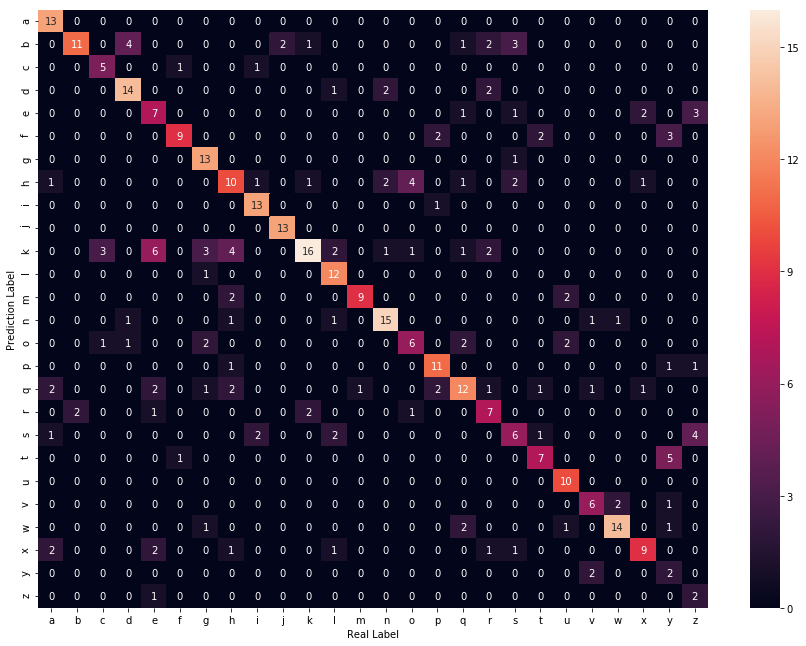

In [16]:
import seaborn as sn

df_cm = pd.DataFrame(cm, index = [i for i in "abcdefghijklmnopqrstuvwxyz"],
                  columns = [i for i in "abcdefghijklmnopqrstuvwxyz"])
plt.figure(figsize = (15,11))
sn.heatmap(df_cm, fmt='.20g', annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [11]:
def get_pred_train(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(26)]
    class1, class2 = classes[i]
    
    class1_indexes = []
    class2_indexes = []
    
    test_X = X[j]
    test_y = y[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    
    
    return pred_outputs

In [12]:
# 这里反而pred-outputs 的0 是第二类(id是1)，1是第一类（id是0）
pred_value = []

for j in range(1600):
    pred = []
    vote = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    for i in range(325):
        pred_outputs = get_pred_train(i, j)
        #print(i,classes[i],pred_outputs[0][0])
        vote_for = classes[i][1 - pred_outputs[0]]
        vote[vote_for] += 1 #1 is class 1(id:0) and 0 is class 2(id:1)
    pred_value.append(np.where(vote==np.max(vote)))        
    #print(np.array(pred).T)
from random import randint
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
train_acc = np.sum(list_P == y)/1600
print("Train Accuracy:{}".format(train_acc))

Train Accuracy:0.715625


In [13]:
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
avg_train_acc = np.mean(winner_fitness)
print("Avg Train Accuracy:{}".format(avg_train_acc))

Avg Train Accuracy:0.9319703543903773


In [14]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
total_nodes = np.sum(list_nodes_number)
total_connections = np.sum(list_connection_number)
print("Total nodes:{} Total connections::{}".format(total_nodes, total_connections))

Total nodes:2467 Total connections::3167


In [15]:
with open("ovo1.txt","w") as f:
    for item in [avg_train_acc, train_acc, test_acc, total_nodes, total_connections]:
        f.write(str(item)+'\n')